In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd 


def load_data():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter=',' 
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(file_path_labels, delimiter=delimiter, header=0, quotechar='"')
    return df_data, df_labels 

def standardize(train_data, test_data):
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.transform(test_data)
    return train_data, test_data

def load_unified_df():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter=',' 
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(file_path_labels, delimiter=delimiter, header=0, quotechar='"')
    df = pd.concat([df_data, df_labels], axis=1)
    df.rename(columns={'x': 'Label'}, inplace=True)
    return df

In [4]:
classifiers = {
    'kNN': KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

In [7]:
data, labels = load_data()

results = {}
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
    X_train_scaled, X_test_scaled = standardize(X_train.values, X_test.values)
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train.values.ravel())
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        if name not in results.keys():
            results[name] = []
        results[name].append(accuracy)

Plot the accuracy of each classifier without any further optimization except data standardization. 

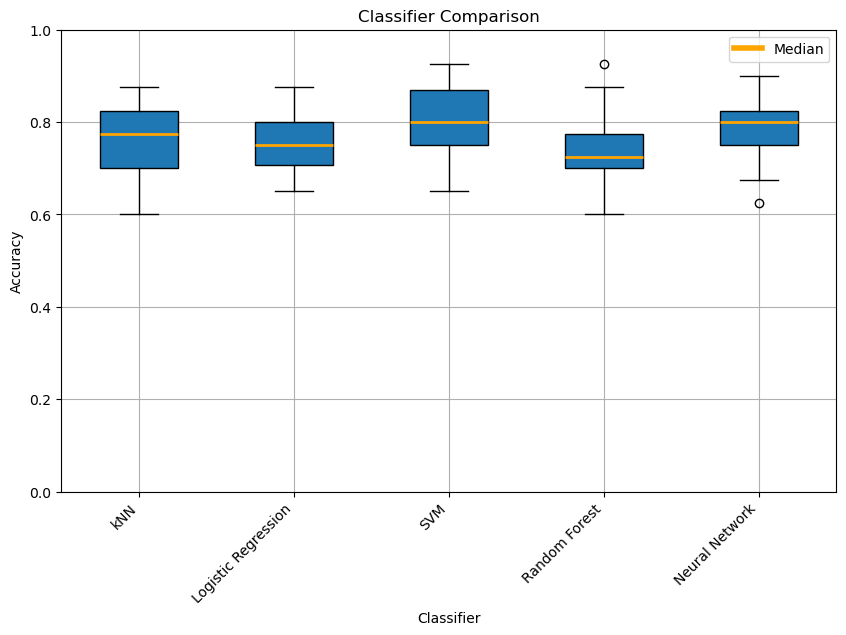

In [14]:
from matplotlib.lines import Line2D

df = pd.DataFrame(list(results.items()), columns=["Classifier", "Accuracy"])

# Plotting
plt.figure(figsize=(10, 6))

bp = plt.boxplot(
    df["Accuracy"].tolist(),
    patch_artist=True,
    medianprops=dict(color="orange", linewidth=2),
)

plt.xticks([i + 1 for i in range(len(df))], df["Classifier"], rotation=45, ha="right")
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Classifier Comparison")
plt.ylim(0.0, 1.0)
plt.grid(True)


custom_lines = [
    Line2D([0], [0], color="orange", lw=4)
]  
plt.legend(custom_lines, ["Median"], loc="best")  

plt.show()

In [42]:
from sklearn.metrics import confusion_matrix

results = {}
conf_matrices = {name: [] for name in classifiers.keys()}  # Dictionary to store confusion matrices

for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
    X_train_scaled, X_test_scaled = standardize(X_train.values, X_test.values)
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train.values.ravel())
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        if name not in results:
            results[name] = []
        results[name].append(accuracy)
        # Append confusion matrix for this iteration
        conf_matrices[name].append(confusion_matrix(y_test, y_pred))

# Average the confusion matrices
for name in classifiers.keys():
    conf_matrices[name] = np.mean(conf_matrices[name], axis=0)

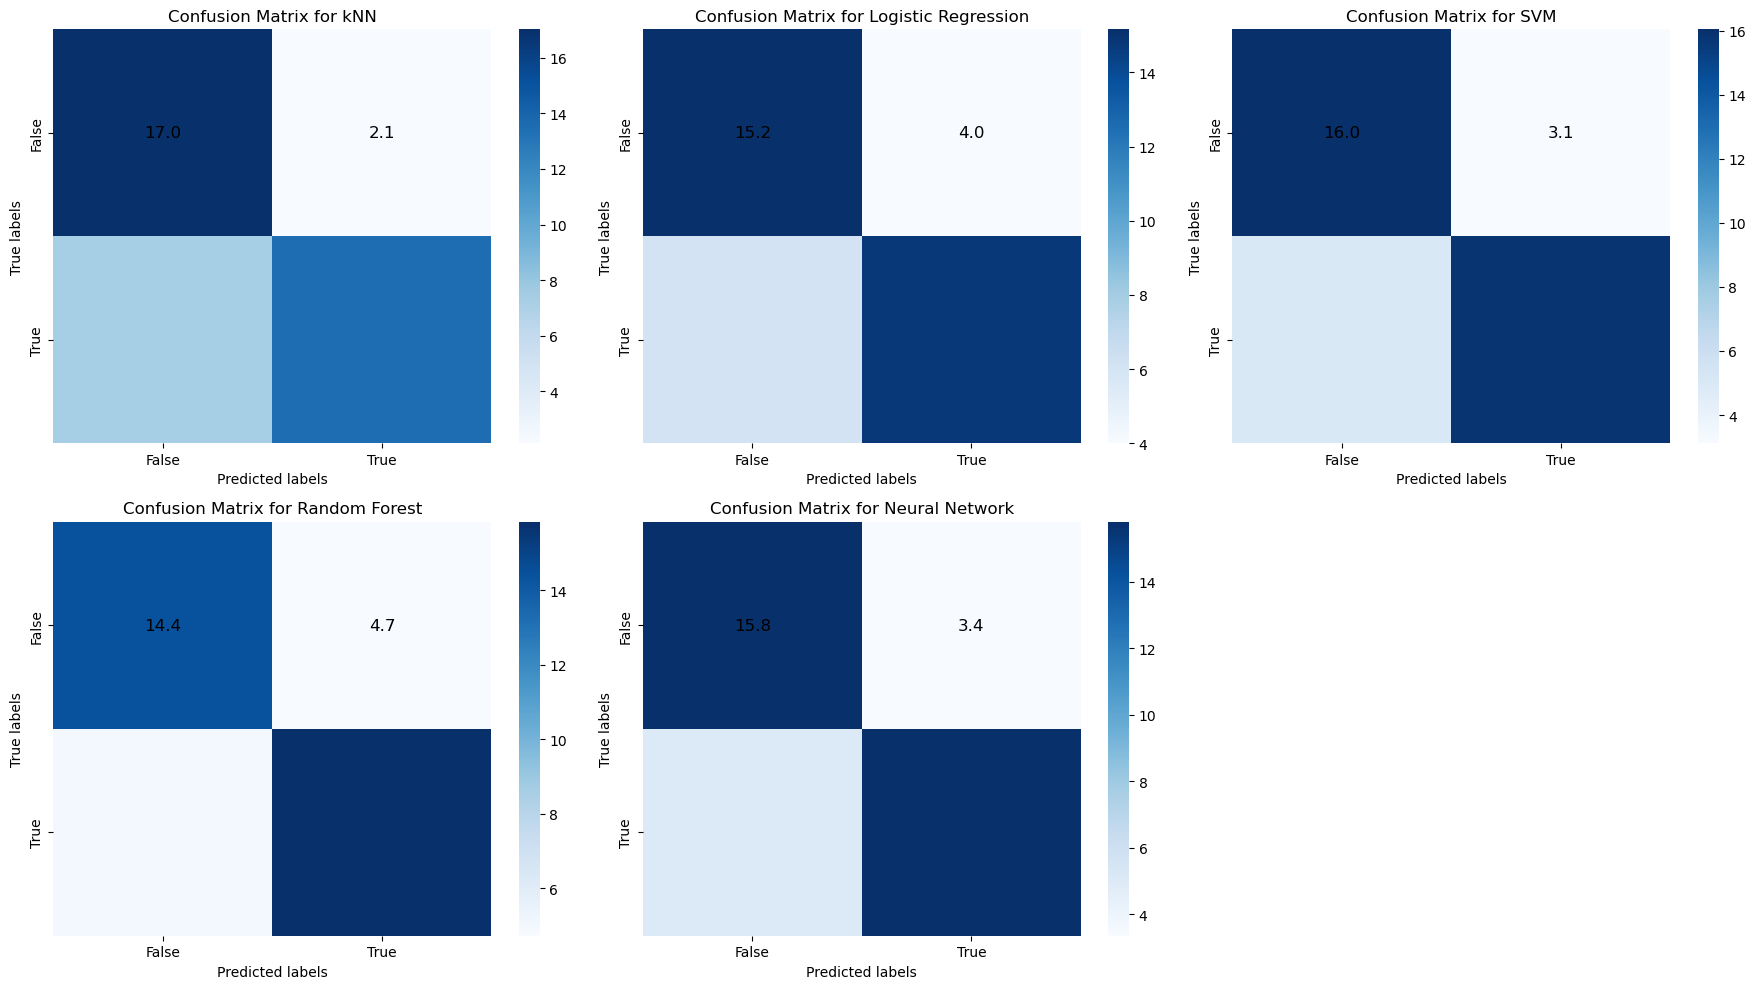

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

for idx, (name, matrix) in enumerate(conf_matrices.items(), 1):
    plt.subplot(2, 3, idx)
    # Create a heatmap with custom x and y labels
    sns.heatmap(
        matrix,
        annot=True,  # Ensure annotations are enabled
        fmt=".1f",   # Adjust formatting to show one decimal place
        cmap="Blues",
        xticklabels=["False", "True"],
        yticklabels=["False", "True"],
        annot_kws={"size": 12, "color": "black"}  # Increase font size and specify color
    )
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")

plt.tight_layout()
plt.show()

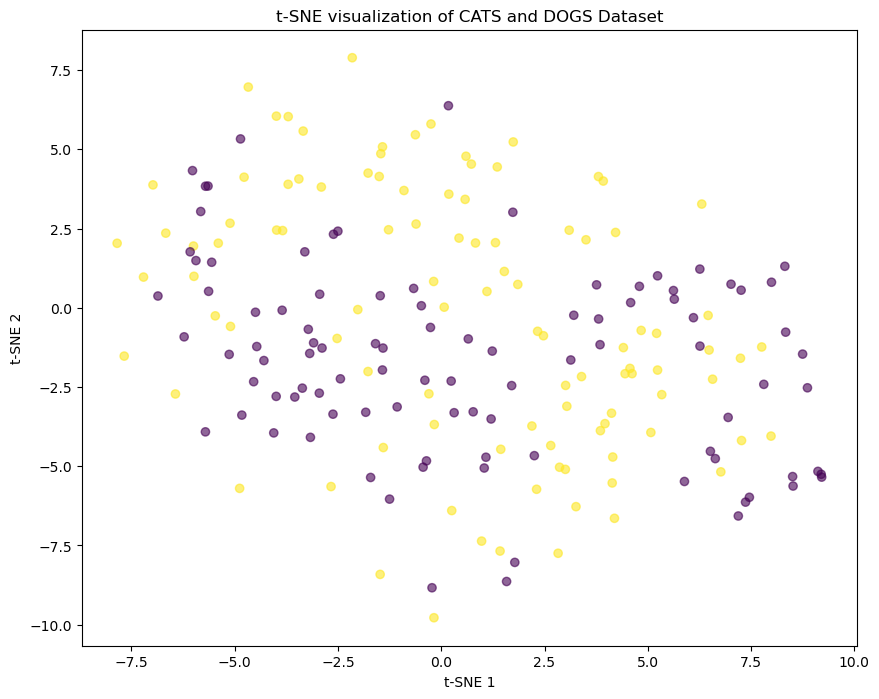

In [41]:
from sklearn.manifold import TSNE

# Load the data
df = load_unified_df()

# Optional: Scale the data to normalize feature variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, :-1])

# t-SNE Transformation
tsne = TSNE(n_components=2, random_state=42) 
data_tsne = tsne.fit_transform(data_scaled)

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    data_tsne[:, 0],
    data_tsne[:, 1],
    c=df["Label"],
    cmap="viridis",
    alpha=0.6,
)
plt.title("t-SNE visualization of CATS and DOGS Dataset")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(False)
plt.show()

In [ ]:
# Example function to reshape images into blocks
def reshape_into_blocks(images):
    # Reshape each 64x64 image into 16 blocks of 16x16
    # Assuming images.shape == (n_samples, 64, 64)
    n_samples = images.shape[0]
    blocks = images.reshape(n_samples, 4, 16, 4, 16)
    blocks = blocks.swapaxes(2, 3).reshape(n_samples, 16, 256)
    return blocks

def custom_mapping(x):
    # Determine the group number (0-3) and position in the group (0-3)
    group_number = (x // 4) % 4
    position_in_group = x % 4

    # Base starting number for each group
    start_number = 3 - group_number

    # Calculate the output number
    return start_number + position_in_group * 4

reshaped_image_data = reshape_into_blocks(image_data)
print(f"Image data shape: {image_data.shape}")
print(f"Reshaped image data shape: {reshaped_image_data.shape}")

first_reshaped_image = reshaped_image_data[0]
print(f"Reshaped image shape: {first_reshaped_image.shape}")

# Print the first reshaped image
fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    custom_index = custom_mapping(i)
    ax.imshow(first_reshaped_image[i].reshape(16, 16), cmap="gray")
    ax.axis("off")
